<h1 align="center">EQE512 MATRIX METHODS IN STRUCTURAL ANALYSIS 
<br>
<br>
Week 07
<br>
<br>
Frame Systems- Compression/Tension Members - Support displacement</h1> 

<h3 align="center">Dr. Ahmet Anıl Dindar (adindar@gtu.edu.tr)</h3> 
<h4 align="center">2021 Fall  </h4> 

---
**Today's Topics**

1- Frame member stiffness matrix

2- Frame System Stiffness matrix

3- Support settlements

4- Elastic supports

## Frame member stiffness matrix

**Freedom**

<img src="figures/9-EQE512-ColumnMemberExplanation.PNG" width="1000">

---

**Transformation Matrix**

Remember the relation between local and global terms

$$ {\large k^i = (T^i) \hat{k}^i T^i }$$

Remember the transformation matrix;

$$ {\large
T^i = \begin{bmatrix} 
\frac{\Delta_1}{L} & \frac{\Delta_2}{L}  & 0 & 0 & 0 & 0 \\ 
-\frac{\Delta_2}{L} & \frac{\Delta_1}{L}  & 0 & 0 & 0 & 0  \\ 
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 &\frac{\Delta_1}{L} & \frac{\Delta_2}{L}  & 0  \\
0 & 0 & 0 & -\frac{\Delta_2}{L} & \frac{\Delta_1}{L}  & 0   \\
0 & 0 & 0 & 0 & 0 & 1 
\end{bmatrix}}$$

---

**Local Stiffness Matrix**

<img src="figures/column_stiffness_in_local_coordinates.png" width="600">

**Global Stiffness Matrix**

After applying the transformation matrix

<img src="figures/9-EQE512-ColumnMemberStiffness.PNG" width="900">

**Transformation Matrix of Frame Element**

In [1]:
import numpy as np

def transformation_matrix( x1,y1,x2,y2) :
    delta_1 = (x2-x1)
    delta_2 = (y2-y1)
    L = ( (delta_1)**2 + (delta_2)**2)**(0.5)
    
    T = np.array( [[ delta_1 / L , delta_2 / L  , 0 , 0 , 0 , 0],
                   [-delta_2 / L , delta_1 / L  , 0 , 0 , 0 , 0],
                   [0 , 0 , 1 , 0 , 0 , 0  ], 
                   [ 0 , 0 , 0 , delta_1 / L , delta_2 / L , 0 ],
                   [ 0 , 0 , 0, -delta_2 / L , delta_1 / L  , 0],
                   [0 , 0 , 0 , 0 , 0 , 1] ])
    
    return( T)

**Frame Element Member Stiffness Matrix in Local Coordinates**

In [2]:
def column_stiffness_matrix( E , A , I , x1,y1,x2,y2):
    delta_1 = (x2-x1)
    delta_2 = (y2-y1)
    L = ( (delta_1)**2 + (delta_2)**2)**(0.5)
    #
    EA_L = E * A / L
    EI_L = E * I / L
    EI_L2 = EI_L / L
    EI_L3 = EI_L2 / L
    #
    k = np.array([[EA_L , 0 , 0 , -EA_L , 0 , 0],
                  [ 0 , 12*EI_L3 , 6*EI_L2 ,0 , -12*EI_L3 , 6*EI_L2 ],
                  [ 0 , 6*EI_L2 , 4*EI_L , 0 , -6*EI_L2 , 2*EI_L ],
                  [ -EA_L , 0 , 0 , EA_L , 0 , 0 ],
                  [ 0 , -12*EI_L3 ,-6*EI_L2 , 0 , 12*EI_L3 , -6*EI_L2 ],
                  [ 0 , 6*EI_L2 , 2*EI_L , 0 , -6*EI_L2 , 4*EI_L]])
                  
    return( k )
    
    

**Frame Element Member Stiffness Matrix in Global Coordinates**

In [3]:
def column_stiffness_matrix_global( k , T) :
    k_global =  np.matmul( np.matmul(np.transpose( T) , k ) , T )
                          
    return( k_global )

**Example- Test the functions- Beam**

In [4]:
import matplotlib.pyplot as plt


In [13]:
E , A  , I , x1, y1 , x2 , y2 = 21E7 , 334E-5 , 214E-7 , 0 , 0 , 3 , 0

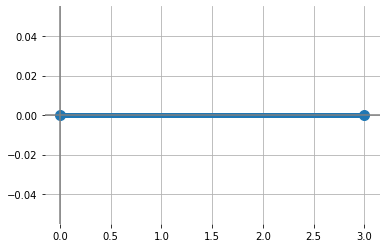

In [14]:
plt.plot( [x1 ,x2] , [ y1 , y2] , "-", marker = "o", ms = 10 , lw= 5) 
plt.grid()
plt.axhline(c="gray")
plt.axvline(c="gray")
plt.box(False)

In [15]:
T = transformation_matrix( x1,y1,x2,y2)
T

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [16]:
k = column_stiffness_matrix( E , A  , I , x1, y1 , x2 , y2)
k

array([[ 233800.        ,       0.        ,       0.        ,
        -233800.        ,       0.        ,       0.        ],
       [      0.        ,    1997.33333333,    2996.        ,
              0.        ,   -1997.33333333,    2996.        ],
       [      0.        ,    2996.        ,    5992.        ,
              0.        ,   -2996.        ,    2996.        ],
       [-233800.        ,       0.        ,       0.        ,
         233800.        ,       0.        ,       0.        ],
       [      0.        ,   -1997.33333333,   -2996.        ,
              0.        ,    1997.33333333,   -2996.        ],
       [      0.        ,    2996.        ,    2996.        ,
              0.        ,   -2996.        ,    5992.        ]])

In [17]:
k_glob = column_stiffness_matrix_global( k , T)
k_glob

array([[ 233800.        ,       0.        ,       0.        ,
        -233800.        ,       0.        ,       0.        ],
       [      0.        ,    1997.33333333,    2996.        ,
              0.        ,   -1997.33333333,    2996.        ],
       [      0.        ,    2996.        ,    5992.        ,
              0.        ,   -2996.        ,    2996.        ],
       [-233800.        ,       0.        ,       0.        ,
         233800.        ,       0.        ,       0.        ],
       [      0.        ,   -1997.33333333,   -2996.        ,
              0.        ,    1997.33333333,   -2996.        ],
       [      0.        ,    2996.        ,    2996.        ,
              0.        ,   -2996.        ,    5992.        ]])

**Example- Test the functions- Columns**

In [21]:
E , A  , I , x1, y1 , x2 , y2 = 21E7 , 334E-5 , 214E-7 , 0 , 0 , 0 , 3 


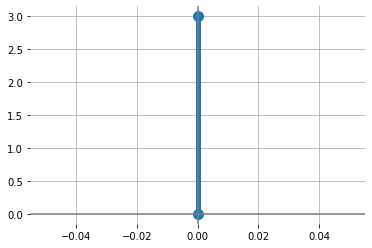

In [22]:
plt.plot( [x1 ,x2] , [ y1 , y2] , "-", marker = "o", ms = 10 , lw= 5) 
plt.grid()
plt.axhline(c="gray")
plt.axvline(c="gray")
plt.box(False)

In [24]:
T = transformation_matrix( x1,y1,x2,y2)
T

array([[ 0.,  1.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])

In [25]:
k = column_stiffness_matrix( E , A  , I , x1, y1 , x2 , y2)
k

array([[ 233800.        ,       0.        ,       0.        ,
        -233800.        ,       0.        ,       0.        ],
       [      0.        ,    1997.33333333,    2996.        ,
              0.        ,   -1997.33333333,    2996.        ],
       [      0.        ,    2996.        ,    5992.        ,
              0.        ,   -2996.        ,    2996.        ],
       [-233800.        ,       0.        ,       0.        ,
         233800.        ,       0.        ,       0.        ],
       [      0.        ,   -1997.33333333,   -2996.        ,
              0.        ,    1997.33333333,   -2996.        ],
       [      0.        ,    2996.        ,    2996.        ,
              0.        ,   -2996.        ,    5992.        ]])

In [26]:
k_glob = column_stiffness_matrix_global( k , T)
k_glob

array([[   1997.33333333,       0.        ,   -2996.        ,
          -1997.33333333,       0.        ,   -2996.        ],
       [      0.        ,  233800.        ,       0.        ,
              0.        , -233800.        ,       0.        ],
       [  -2996.        ,       0.        ,    5992.        ,
           2996.        ,       0.        ,    2996.        ],
       [  -1997.33333333,       0.        ,    2996.        ,
           1997.33333333,       0.        ,    2996.        ],
       [      0.        , -233800.        ,       0.        ,
              0.        ,  233800.        ,       0.        ],
       [  -2996.        ,       0.        ,    2996.        ,
           2996.        ,       0.        ,    5992.        ]])

**Incilined member**

In [32]:
E , A  , I , x1, y1 , x2 , y2 = 21E7 , 334E-5 , 214E-7 , 0 , 0 , 2.5 , 2.5 


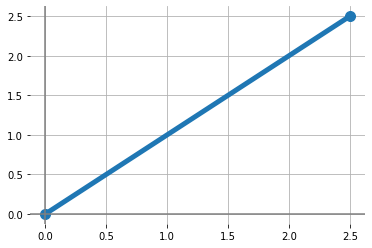

In [33]:
plt.plot( [x1 ,x2] , [ y1 , y2] , "-", marker = "o", ms = 10 , lw= 5) 
plt.grid()
plt.axhline(c="gray")
plt.axvline(c="gray")
plt.box(False)

In [34]:
T = transformation_matrix( x1,y1,x2,y2)
T

array([[ 0.70710678,  0.70710678,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.70710678,  0.70710678,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.70710678,  0.70710678,
         0.        ],
       [ 0.        ,  0.        ,  0.        , -0.70710678,  0.70710678,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ]])

In [35]:
k = column_stiffness_matrix( E , A  , I , x1, y1 , x2 , y2)
k

array([[ 198385.8785297 ,       0.        ,       0.        ,
        -198385.8785297 ,       0.        ,       0.        ],
       [      0.        ,    1220.25134387,    2157.12      ,
              0.        ,   -1220.25134387,    2157.12      ],
       [      0.        ,    2157.12      ,    5084.38059944,
              0.        ,   -2157.12      ,    2542.19029972],
       [-198385.8785297 ,       0.        ,       0.        ,
         198385.8785297 ,       0.        ,       0.        ],
       [      0.        ,   -1220.25134387,   -2157.12      ,
              0.        ,    1220.25134387,   -2157.12      ],
       [      0.        ,    2157.12      ,    2542.19029972,
              0.        ,   -2157.12      ,    5084.38059944]])

In [36]:
k_glob = column_stiffness_matrix_global( k , T)
k_glob

array([[ 99803.06493678,  98582.81359292,  -1525.31417983,
        -99803.06493678, -98582.81359292,  -1525.31417983],
       [ 98582.81359292,  99803.06493678,   1525.31417983,
        -98582.81359292, -99803.06493678,   1525.31417983],
       [ -1525.31417983,   1525.31417983,   5084.38059944,
          1525.31417983,  -1525.31417983,   2542.19029972],
       [-99803.06493678, -98582.81359292,   1525.31417983,
         99803.06493678,  98582.81359292,   1525.31417983],
       [-98582.81359292, -99803.06493678,  -1525.31417983,
         98582.81359292,  99803.06493678,  -1525.31417983],
       [ -1525.31417983,   1525.31417983,   2542.19029972,
          1525.31417983,  -1525.31417983,   5084.38059944]])

---

## Frame System Stiffness matrix


**Frame System Stiffness Matrix**

Determine the system stiffness matrix

<img src="./figures/Week07-FrameExample.png">

E= 210GPa , A = 334E-5 mm2 , I = 214E-7 mm4

In [37]:
import EQE512_functions

In [38]:
# Mapping and numbering
DOF = 3
#Nodes' names with coordinates
joint_nodes = {1:[0,0] , 2:[0,3], 3:[3,3]}

# Members' names and nodes
member_nodes= {1:[1,2] , 2:[2,3]}

# Member properties
member_1 = {"E":210_000_000 ,  "I" : 214E-7 , "A": 334E-5 ,   
                "jointI": joint_nodes[1] , 
                "jointJ": joint_nodes[2]}

member_2 = { "E":210_000_000 ,  "I" : 214E-7 , "A": 334E-5 , 
                "jointI": joint_nodes[2] , 
                "jointJ": joint_nodes[3]}

member_props = {}

for member_no , member_property in zip( member_nodes.keys() , [member_1 ,  member_2] ):
    
    member_props[ member_no ] = member_property   
    
member_props

{1: {'E': 210000000,
  'I': 2.14e-05,
  'A': 0.00334,
  'jointI': [0, 0],
  'jointJ': [0, 3]},
 2: {'E': 210000000,
  'I': 2.14e-05,
  'A': 0.00334,
  'jointI': [0, 3],
  'jointJ': [3, 3]}}

In [39]:
# Data structure for member stiffness matrices
k_members = {}

for member_no , member_property in member_props.items() : 
    print( member_no)
    k_members[member_no] =  EQE512_functions.column_stiffness_matrix_global(member_property , show_T_K= True )
    
    print( "="*100 , "\n" , k_members[member_no])
    
print( "~"*100)  

1
Transformation matrix = 
[[ 0.  1.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]]
and member stiffnes matrix = 
[[ 233800.               0.               0.         -233800.
        0.               0.        ]
 [      0.            1997.33333333    2996.               0.
    -1997.33333333    2996.        ]
 [      0.            2996.            5992.               0.
    -2996.            2996.        ]
 [-233800.               0.               0.          233800.
        0.               0.        ]
 [      0.           -1997.33333333   -2996.               0.
     1997.33333333   -2996.        ]
 [      0.            2996.            2996.               0.
    -2996.            5992.        ]]
 [[   1997.33333333       0.           -2996.           -1997.33333333
        0.           -2996.        ]
 [      0.          233800.               0.               0.
  -233800.     

In [41]:
K = EQE512_functions.system_stiffness_matrix( k_members , joint_nodes , member_nodes , DOF = 3)
K

array([[   1997,       0,   -2996,   -1997,       0,   -2996,       0,
              0,       0],
       [      0,  233800,       0,       0, -233800,       0,       0,
              0,       0],
       [  -2996,       0,    5992,    2996,       0,    2996,       0,
              0,       0],
       [  -1997,       0,    2996,  235797,       0,    2996, -233800,
              0,       0],
       [      0, -233800,       0,       0,  235797,    2996,       0,
          -1997,    2996],
       [  -2996,       0,    2996,    2996,    2996,   11984,       0,
          -2996,    2996],
       [      0,       0,       0, -233800,       0,       0,  233800,
              0,       0],
       [      0,       0,       0,       0,   -1997,   -2996,       0,
           1997,   -2996],
       [      0,       0,       0,       0,    2996,    2996,       0,
          -2996,    5992]])

Let's check the result 

<img src="./figures/Week07-FrameExample-Stiffness_matrix.png">

---

In [ ]:
# Mapping and numbering
DOF = 3
#Nodes' names with coordinates
#joint_nodes = {1:[0,0] , 2:[0,3], 3:[3,3]}

# Members' names and nodes
member_nodes= {1:[1,2] , 2:[2,3]}

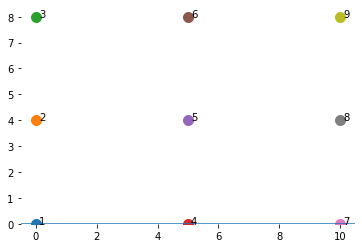

In [119]:
joint_nodes = {}
isim = 1
for i in range(0,13,5) :
    for j in range(0,9,4):
        plt.plot( i , j , marker = "o", ms = 10 )
        joint_nodes[isim ] = [i,j]
        plt.text( i+.1, j , isim)
        isim += 1

plt.axhline()
plt.ylim(bottom = 0 )
plt.box(False)

In [120]:
joint_nodes

{1: [0, 0],
 2: [0, 4],
 3: [0, 8],
 4: [5, 0],
 5: [5, 4],
 6: [5, 8],
 7: [10, 0],
 8: [10, 4],
 9: [10, 8]}

In [121]:
member_nodes= {1:[1,2] , 2:[2,3] , 3:[4,5], 4:[5,6],5:[7,8] , 6:[8,9], 7:[2,5] , 8:[5,8],9:[3,6] , 10:[6,9]}
member_nodes

{1: [1, 2],
 2: [2, 3],
 3: [4, 5],
 4: [5, 6],
 5: [7, 8],
 6: [8, 9],
 7: [2, 5],
 8: [5, 8],
 9: [3, 6],
 10: [6, 9]}

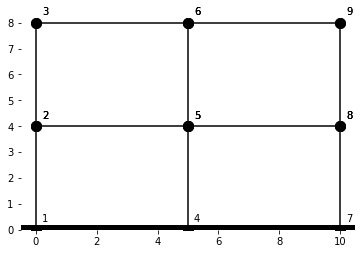

In [122]:
# Member properties
column = {"E":30_000_000 ,  "I" : 200 , "A": 100 }
beam = { "E":30_000_000 ,  "I" : 100 , "A": 50 }

plt.figure()
member_props = {}
for member , nodes in member_nodes.items():
    #print( member , joint_nodes[nodes[0]],  joint_nodes[nodes[1]])
    
    plt.plot( [joint_nodes[nodes[0]][0] , joint_nodes[nodes[1]][0]] ,
            [joint_nodes[nodes[0]][1] , joint_nodes[nodes[1]][1]],c= "k", marker = "o",ms = 10) 
    
    plt.text( joint_nodes[nodes[0]][0]+.2,joint_nodes[nodes[0]][1]+.3 , nodes[0])
    plt.text( joint_nodes[nodes[1]][0]+.2,joint_nodes[nodes[1]][1]+.3 , nodes[1])
    
    
    if joint_nodes[nodes[0]][0] ==  joint_nodes[nodes[1]][0]:
     #   print( "Column")
        member_props[member] = {"E":30_000_000 ,  "I" : 200 , "A": 100 , 'jointI': joint_nodes[nodes[0]],  'jointJ':joint_nodes[nodes[1]]}
    else: 
      #  print("Beam")
        member_props[member] = {"E":30_000_000 ,  "I" : 100 , "A": 50, 'jointI':joint_nodes[nodes[0]],  'jointJ':joint_nodes[nodes[1]]}
plt.axhline(c = "black",lw= 10)
plt.ylim(bottom = 0 )
plt.box(False)

In [123]:
# Data structure for member stiffness matrices
k_members = {}

for member_no , member_property in member_props.items() : 
    print( member_no)
    k_members[member_no] =  EQE512_functions.column_stiffness_matrix_global(member_property , show_T_K= True )
    
    print( "="*100 , "\n" , k_members[member_no])
    
print( "~"*100)  

1
Transformation matrix = 
[[ 0.  1.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]]
and member stiffnes matrix = 
[[ 7.500e+08  0.000e+00  0.000e+00 -7.500e+08  0.000e+00  0.000e+00]
 [ 0.000e+00  1.125e+09  2.250e+09  0.000e+00 -1.125e+09  2.250e+09]
 [ 0.000e+00  2.250e+09  6.000e+09  0.000e+00 -2.250e+09  3.000e+09]
 [-7.500e+08  0.000e+00  0.000e+00  7.500e+08  0.000e+00  0.000e+00]
 [ 0.000e+00 -1.125e+09 -2.250e+09  0.000e+00  1.125e+09 -2.250e+09]
 [ 0.000e+00  2.250e+09  3.000e+09  0.000e+00 -2.250e+09  6.000e+09]]
 [[ 1.125e+09  0.000e+00 -2.250e+09 -1.125e+09  0.000e+00 -2.250e+09]
 [ 0.000e+00  7.500e+08  0.000e+00  0.000e+00 -7.500e+08  0.000e+00]
 [-2.250e+09  0.000e+00  6.000e+09  2.250e+09  0.000e+00  3.000e+09]
 [-1.125e+09  0.000e+00  2.250e+09  1.125e+09  0.000e+00  2.250e+09]
 [ 0.000e+00 -7.500e+08  0.000e+00  0.000e+00  7.500e+08  0.000e+00]
 [-2.250e+09  0.000

In [84]:
K = EQE512_functions.system_stiffness_matrix( k_members , joint_nodes , member_nodes , DOF = 3)
K

array([[ 1125000000,           0, -2147483648, -1125000000,           0,
        -2147483648,           0,           0,           0,           0,
                  0,           0,           0,           0,           0,
                  0,           0,           0,           0,           0,
                  0,           0,           0,           0,           0,
                  0,           0],
       [          0,   750000000,           0,           0,  -750000000,
                  0,           0,           0,           0,           0,
                  0,           0,           0,           0,           0,
                  0,           0,           0,           0,           0,
                  0,           0,           0,           0,           0,
                  0,           0],
       [-2147483648,           0, -2147483648, -2147483648,           0,
        -2147483648,           0,           0,           0,           0,
                  0,           0,           0,        

In [89]:
whos

Variable                         Type        Data/Info
------------------------------------------------------
A                                float       0.00334
DOF                              int         3
E                                float       210000000.0
EQE512_functions                 module      <module 'EQE512_functions<...>is\\EQE512_functions.py'>
I                                float       2.14e-05
K                                ndarray     27x27: 729 elems, type `int32`, 2916 bytes
T                                ndarray     6x6: 36 elems, type `float64`, 288 bytes
beam                             dict        n=3
column                           dict        n=3
column_stiffness_matrix          function    <function column_stiffnes<...>ix at 0x000001F122002550>
column_stiffness_matrix_global   function    <function column_stiffnes<...>al at 0x000001F1220025E0>
i                                int         10
isim                             int         10
j       

---
## Support settlements

---
## Elastic supports

$$ {\large
K = \begin{bmatrix} 
a & 0 & 0 & a & 0 & 0 \\
0 & b & c & 0 & 0 & 0 \\
0 & c & d & 0 & 0 & 0 \\
a & 0 & 0 & a & 0 & 0 \\
0 & 0 & 0 & 0 & b & c \\
0 & 0 & 0 & 0 & b & c
\end{bmatrix}}$$


K_axial_stifness = e + K


$$ {\large
K = \begin{bmatrix} 
a+e & 0 & 0 & a+e & 0 & 0 \\
0 & b & c & 0 & 0 & 0 \\
0 & c & d & 0 & 0 & 0 \\
a+e & 0 & 0 & a+e & 0 & 0 \\
0 & 0 & 0 & 0 & b & c \\
0 & 0 & 0 & 0 & b & c
\end{bmatrix}}$$

---

**NEXT WEEK**
The topics for the next week 

- "Midterm Exam"

- Term Project : Please set your groups in GTUZEM: Please select your groups until 2021_1115 8am using the [GTUZEM Moodle site](https://gtuzem.gtu.edu.tr/UE2/mod/choice/view.php?id=19200)